In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer      #text convert vector /numerical
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle, joblib
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [4]:
# regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
df = pd.read_csv("insurance (1).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df.duplicated()
df.duplicated().sum()

np.int64(1)

In [11]:
df.drop_duplicates(inplace=True)
df.drop_duplicates().sum()

age                                                     52440
sex         femalemalemalemalemalefemalefemalefemalemalefe...
bmi                                                 40997.035
children                                                 1465
smoker      yesnonononononononononoyesnonoyesnonononoyesno...
region      southwestsoutheastsoutheastnorthwestnorthwests...
charges                                       17754185.427659
dtype: object

In [12]:
df["bmi"].nunique()

548

In [13]:
cat_col = df.select_dtypes(include="object")
cat_col.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [14]:
num_col = df.select_dtypes(exclude="object")
num_col.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [15]:
pd.get_dummies(cat_col)                 #true and false output
pd.get_dummies(cat_col).astype(int)  

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [16]:
dt1 = {
    "male":0,
    "female":1
}

In [17]:
df["sex"] = df["sex"].map(dt1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [18]:
dt2 = {
    "yes":0,
    "no":1
}

In [19]:
df["smoker"] = df["smoker"].map(dt2)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [20]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
dt3 = {
    'southwest':0, 
    'southeast':1,
    'northwest':2, 
    'northeast':3
}

In [22]:
df["region"] = df["region"].map(dt3)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [23]:
final_df = pd.concat([df], axis=1)
final_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [24]:
matrix = final_df.corr()
matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,0.025587,-0.001626,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,0.076596,0.004936,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,-0.003746,-0.157574,0.198401
children,0.041536,-0.017848,0.012755,1.000000,-0.007331,-0.016258,0.067389
smoker,0.025587,0.076596,-0.003746,-0.007331,1.000000,-0.002358,-0.787234
region,-0.001626,0.004936,-0.157574,-0.016258,-0.002358,1.000000,0.006547
charges,0.298308,-0.058044,0.198401,0.067389,-0.787234,0.006547,1.000000


In [25]:
x = final_df.drop("charges", axis=1)
y = final_df["charges"]

In [26]:
x


,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,1
1336,21,1,25.800,0,1,0


In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [29]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor()
}

In [30]:
for name, model in models.items():
    model.fit(x_train, y_train)
    # y_pred = model.predict(x_test)
    # y_pred

In [31]:
import joblib
joblib.dump(model, "model.pkl")
model = joblib.load('model.pkl')



In [32]:
model.score(x_test, y_test) 

0.843003840671048

In [33]:
model.score(x_train,y_train)

0.9762966075234851

In [34]:
y_pred = model.predict(x_test)
y_pred

array([38189.404443  , 47611.5629061 ,  7303.9515278 , 34300.6526545 ,
       20798.4815862 , 10464.7282685 ,  8278.4043403 , 19611.1869186 ,
       11824.8160518 ,  3537.3877498 ,  8701.3029442 ,  8709.3012425 ,
       17332.9455674 ,  5456.4577142 ,  5120.5868158 , 46851.0837185 ,
       28483.471673  , 21108.8837273 ,  2542.8834295 ,  4712.3552735 ,
        3792.8859889 , 13550.5088976 , 10947.127495  ,  2771.4721759 ,
        8000.3137278 ,  9483.9271614 ,  9851.1578778 ,  7565.4667263 ,
       10929.7106732 ,  4750.3595057 , 17191.477315  ,  8895.263138  ,
        5882.528133  ,  7728.8427035 , 11491.6811307 ,  6082.5926046 ,
       43384.3333695 ,  4344.4985127 , 13150.883848  ,  5778.38299   ,
       11764.1707351 , 13498.624237  ,  9167.0116193 , 11445.1294204 ,
        6496.0949838 ,  1451.541192  , 41186.5991157 ,  7226.7746508 ,
       22384.366213  ,  8203.8582275 , 17967.8398755 , 40916.4209923 ,
        4084.1301798 , 40384.9818418 , 28090.245732  , 15359.5789262 ,
      

In [35]:
df1 = pd.DataFrame({"actual": y_test, "predicted": y_pred})
df1

,actual,predicted
322,35491.64000,38189.404443
530,48675.51770,47611.562906
1319,7201.70085,7303.951528
259,33750.29180,34300.652655
1307,21472.47880,20798.481586
...,...,...
504,5974.38470,6011.209318
823,8219.20390,9754.938636
510,11763.00090,12351.258100
198,9644.25250,10147.907735


In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


2713.040964531443

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


24910524.627283633

In [38]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))   

np.float64(4991.044442527399)

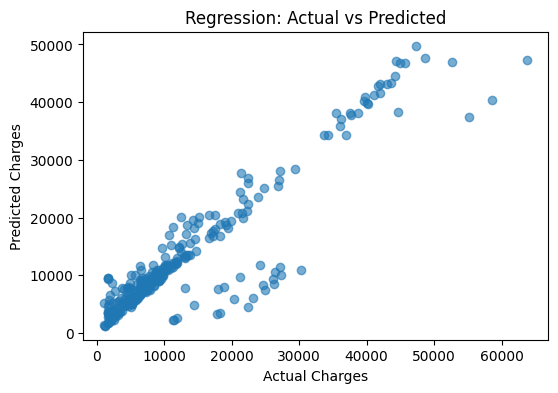

In [39]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)   # <-- y_pred use karo
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Regression: Actual vs Predicted")
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [41]:
encoders = {}   # dictionary to store label encoders
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le   # save the encoder for later use



In [42]:
x = df.drop("smoker", axis=1)
y = df["smoker"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [44]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [45]:
for name, model in models.items():
    model.fit(x_train, y_train)

In [46]:
model.score(x_test, y_test) 

0.9776119402985075

In [47]:
model.score(x_train,y_train)

1.0

In [48]:
y_pred_clf = model.predict(x_test)
y_pred_clf

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

In [49]:
df2 = pd.DataFrame({"actual": y_test, "predicted": y_pred_clf})
df2

,actual,predicted
60,1,1
29,0,0
90,1,1
561,1,1
1046,1,1
...,...,...
17,1,1
1173,1,1
176,1,1
165,1,1


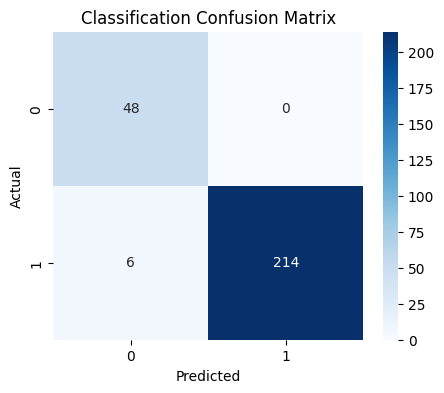

In [50]:
cm = confusion_matrix(y_test, y_pred_clf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Classification Confusion Matrix")
plt.show()